In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
dd = pd.read_csv('diabetes.csv')

In [ ]:
dd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dd.Insulin.median()

30.5

In [ ]:
data=dd.drop(['Outcome'],axis=1)
td=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
dd[td]=dd[td].replace(0,np.NaN)

In [ ]:
dd.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
data=dd.copy()

In [ ]:
data.Pregnancies=data.Pregnancies.fillna(data.Pregnancies.median())
data.Glucose=data.Glucose.fillna(data.Glucose.median())
data.BloodPressure=data.BloodPressure.fillna(data.BloodPressure.median())
data.SkinThickness=data.SkinThickness.fillna(data.SkinThickness.median())
data.Insulin=data.Insulin.fillna(data.Insulin.median())
data.BMI=data.BMI.fillna(data.BMI.median())
data.DiabetesPedigreeFunction=data.DiabetesPedigreeFunction.fillna(data.DiabetesPedigreeFunction.median())
data.Age=data.Age.fillna(data.Age.median())

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dd['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
X = data.drop('Outcome',axis=1)
Y = dd['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47


In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

<BarContainer object of 2 artists>

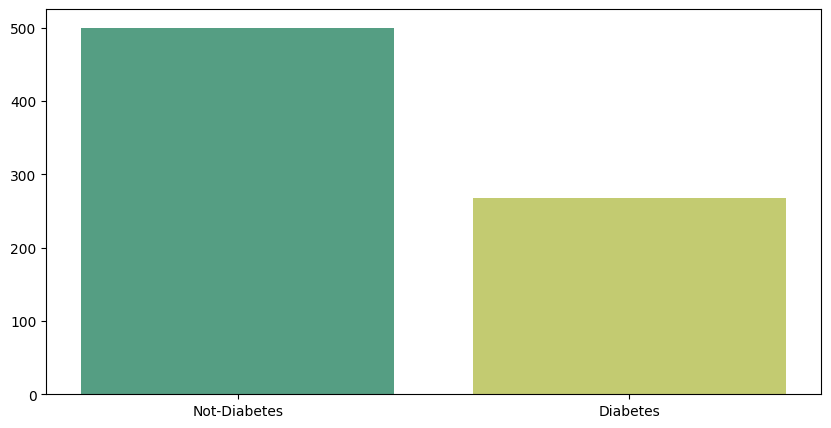

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))


count = dd['Outcome'].value_counts()
perc  = (count/len(X))*100


labels = ['Not-Diabetes','Diabetes']
colors = ['#559e83','#c3cb71']
bsizes = [count[0],count[1]]
sizes = [perc[0],perc[1]]

ax1.bar(labels,bsizes,label=labels, color=colors)

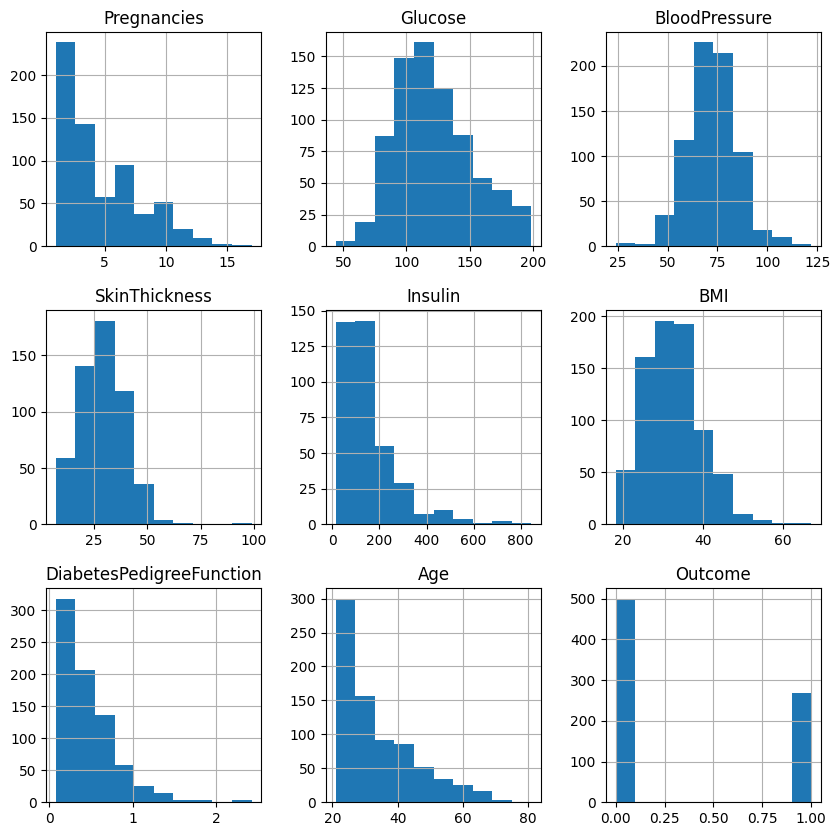

In [ ]:
dd.hist(bins=10,figsize=(10,10))
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, stratify=Y, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (384, 8) (384, 8)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranf=RandomForestClassifier()
ranf.fit(X_train,Y_train)
prf_test=ranf.predict(X_test)

In [ ]:
print('Data Training Report : \n\n' ,classification_report(prf_test,Y_test))

Data Training Report : 

               precision    recall  f1-score   support

           0       0.88      0.79      0.83       276
           1       0.57      0.71      0.64       108

    accuracy                           0.77       384
   macro avg       0.73      0.75      0.73       384
weighted avg       0.79      0.77      0.78       384



In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)
log_predict = log.predict(X_test)
print('Data Training Report : \n\n',classification_report(Y_test,log_predict))

Data Training Report : 

               precision    recall  f1-score   support

           0       0.76      0.88      0.82       250
           1       0.68      0.49      0.57       134

    accuracy                           0.74       384
   macro avg       0.72      0.68      0.69       384
weighted avg       0.73      0.74      0.73       384



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, log_predict)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[220  30]
 [ 69  65]]


<Axes: >

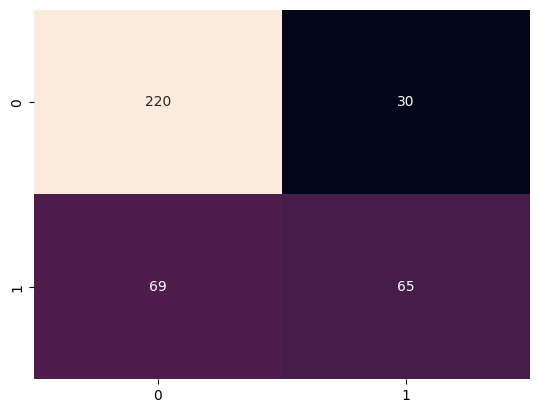

In [ ]:
sns.heatmap(cm, cbar= False, fmt='g', annot= True)

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
svm_train_predict = classifier.predict(X_train)
training_data_svm = classification_report(svm_train_predict, Y_train)

In [ ]:
print('Data Training Report : \n\n', training_data_svm)

Data Training Report : 

               precision    recall  f1-score   support

           0       0.90      0.79      0.84       285
           1       0.55      0.75      0.64        99

    accuracy                           0.78       384
   macro avg       0.73      0.77      0.74       384
weighted avg       0.81      0.78      0.79       384

